## **Titanic Veri Görselleştirme**

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Kütüphaneleri Yükle

In [6]:
#Anaconda gibi temel kütüphaneler kurulu 
#pip install pandas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Veriyi Yükle

In [7]:
df_train=pd.read_csv('/kaggle/input/titanic/train.csv')#jupyter notebook da path değişmeli
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')#jupyter notebook da path değişmeli
df_train.shape,df_test.shape

((891, 12), (418, 11))

## Veri Önişleme

### Keşifsel Veri Analizi

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.info()

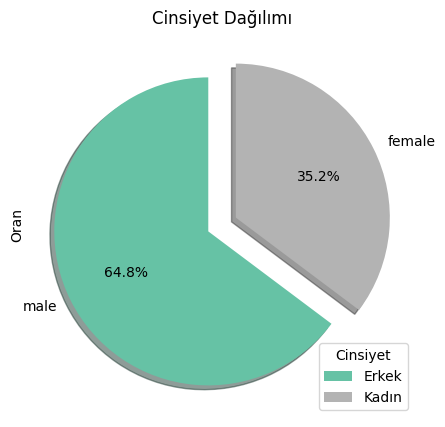

In [57]:
df_train['Sex'].value_counts().plot(kind='pie', 
                                    autopct='%1.1f%%', 
                                    shadow=True,
                                    startangle=90,
                                    ylabel='Sayı',
                                    explode=[0.1,0.1],
                                    cmap='Set2',#cmap='viridis'
                                    figsize=(5,5),
                                   title='Cinsiyet Dağılımı')
plt.ylabel('Oran');
#plt.xticks(['male','female'],['Erkek','Kadın']);
plt.legend(title='Cinsiyet',labels=['Erkek','Kadın']);

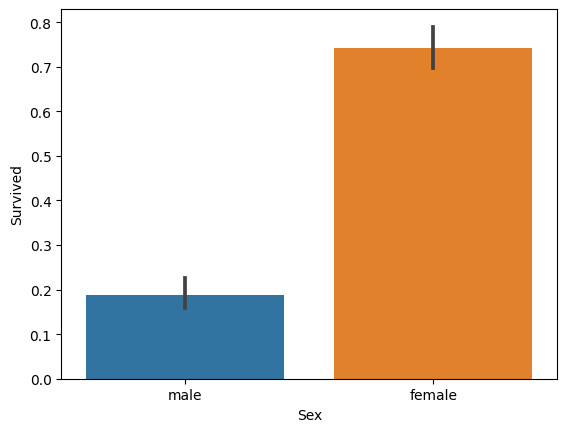

In [14]:
sns.barplot(x='Sex',y='Survived',data=df_train);

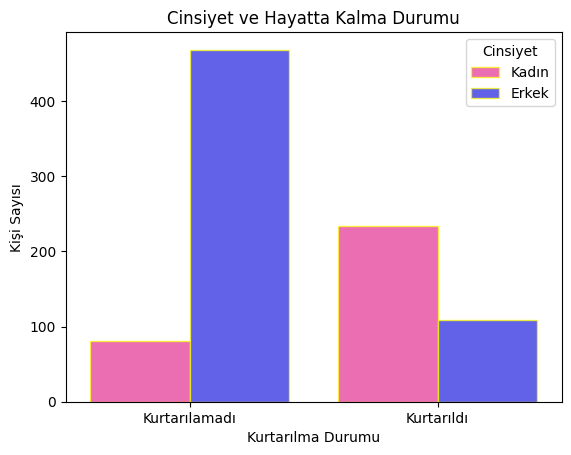

In [52]:
sns.countplot(x='Survived',hue='Sex',
              data=df_train,
              palette={'male':'blue','female':'#FF1493'},
              hue_order=['female','male'],
              dodge=True,
              alpha=0.7,
              edgecolor='yellow',
             );
#plt.legend(loc='upper right'); etiketin konumunu belirler
plt.title('Cinsiyet ve Hayatta Kalma Durumu');
plt.xlabel('Kurtarılma Durumu');
plt.ylabel('Kişi Sayısı');
plt.xticks([0,1],['Kurtarılamadı','Kurtarıldı']);
plt.legend(title='Cinsiyet',labels=['Kadın','Erkek']);

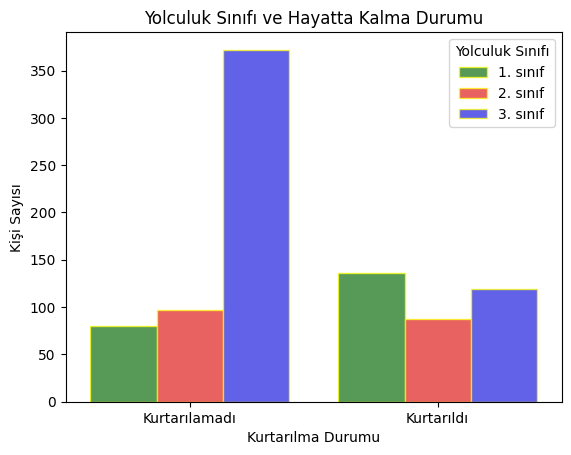

In [54]:
sns.countplot(x='Survived',hue='Pclass',
              data=df_train,
              palette={1:'green',2:'red',3:'blue'},
              hue_order=[1,2,3],
              dodge=True,
              alpha=0.7,
              edgecolor='yellow',
             );
#plt.legend(loc='upper right'); etiketin konumunu belirler
plt.title('Yolculuk Sınıfı ve Hayatta Kalma Durumu');
plt.xlabel('Kurtarılma Durumu');
plt.ylabel('Kişi Sayısı');
plt.xticks([0,1],['Kurtarılamadı','Kurtarıldı']);
plt.legend(title='Yolculuk Sınıfı',labels=['1. sınıf','2. sınıf','3. sınıf']);

In [61]:
import warnings
warnings.filterwarnings('ignore')

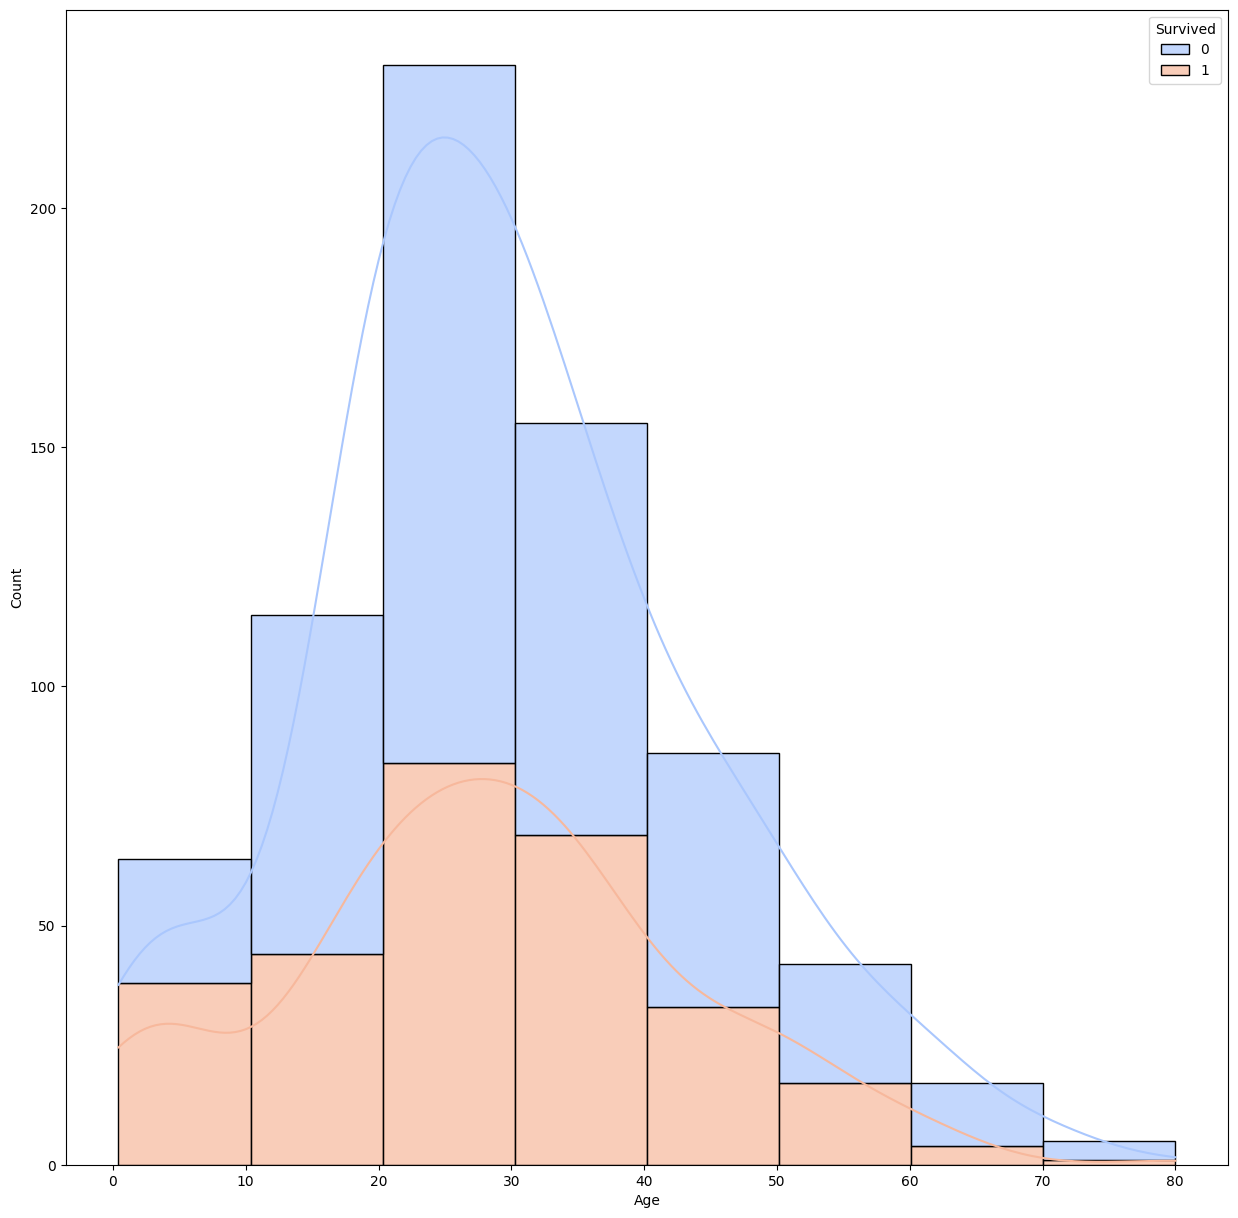

In [62]:
plt.figure(figsize=(15,15))
df_4=df_train.reset_index(drop=True)
sns.histplot(data=df_4, x='Age', hue='Survived', multiple='stack',
            kde=True, palette='coolwarm', bins=8,
            alpha=.7);